# Bearing Failure Prediction - Exploratory Data Analysis

In [ ]:
import pandas as pd
import glob
import numpy as np
import os

#visualization library for creating pretty graphs and plots
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
# use your paths
path1 = r'C:/Users/michal.filipiak/Desktop/PW/IML/1st_test'
path2 = r'C:/Users/michal.filipiak/Desktop/PW/IML/2nd_test'
path3 = r'C:/Users/michal.filipiak/Desktop/PW/IML/3rd_test'
files = glob.glob(path1 + "/*")

li = []
time = 0
for filename in files[0::20]:
    df = pd.read_csv(filename, index_col=None, header=None, sep='\t')
    df['Time'] = time
    time = time + 200
    li.append(df)
    
data1 = pd.concat(li, ignore_index=True)
data1.columns = ['Bearing 1 x', 'Bearing 1 y', 'Bearing 2 x', 'Bearing 2 y', 'Bearing 3 x', 'Bearing 3 y', 'Bearing 4 x', 'Bearing 4 y', 'Time']

In [40]:
path2 = r'C:/Users/michal.filipiak/Desktop/PW/IML/2nd_test'
files = glob.glob(path2 + "/*")

li = []
time = 0
for filename in files[0::10]:
    df = pd.read_csv(filename, index_col=None, header=None, sep='\t')
    df['Time'] = time
    time = time + 200
    li.append(df)
    
data2 = pd.concat(li, ignore_index=True)
data2.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4',  'Time']


In [13]:
path3 = r'C:/Users/michal.filipiak/Desktop/PW/IML/3rd_test'
files = glob.glob(path3 + "/*")

li = []
time = 0
for filename in files[0::20]:
    df = pd.read_csv(filename, index_col=None, header=None, sep='\t')
    df['Time'] = time
    time = time + 200
    li.append(df)
    
data3 = pd.concat(li, ignore_index=True)
data3.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4',  'Time']

## Data sets preview

In [10]:
data1

,Bearing 1 x,Bearing 1 y,Bearing 2 x,Bearing 2 y,Bearing 3 x,Bearing 3 y,Bearing 4 x,Bearing 4 y,Time
0,-0.115,-0.027,0.044,-0.073,-0.137,-0.032,-0.129,-0.181,0
1,-0.081,-0.129,-0.027,-0.042,-0.212,-0.115,-0.151,-0.110,0
2,-0.027,-0.017,-0.051,-0.015,-0.083,-0.029,-0.139,-0.146,0
3,0.059,-0.112,-0.032,-0.081,-0.100,-0.103,-0.166,-0.134,0
4,0.002,0.024,-0.083,-0.127,-0.154,-0.066,-0.110,-0.176,0
...,...,...,...,...,...,...,...,...,...
2170875,-0.085,-0.173,0.120,-0.032,-0.610,0.178,-0.413,0.032,21000
2170876,-0.134,0.110,-0.044,-0.015,-0.801,0.171,-0.095,-0.320,21000
2170877,-0.139,-0.037,-0.166,0.046,0.142,0.000,0.110,-0.288,21000
2170878,-0.081,-0.132,-0.317,-0.193,0.042,-0.088,0.007,-0.251,21000


In [15]:
data2

,Bearing 1,Bearing 2,Bearing 3,Bearing 4,Time
0,-0.049,-0.071,-0.132,-0.010,0
1,-0.042,-0.073,-0.007,-0.105,0
2,0.015,0.000,0.007,0.000,0
3,-0.051,0.020,-0.002,0.100,0
4,-0.107,0.010,0.127,0.054,0
...,...,...,...,...,...
1023995,0.278,-0.210,0.396,0.046,9800
1023996,0.310,-0.168,0.244,0.095,9800
1023997,0.034,-0.151,0.254,0.132,9800
1023998,0.103,-0.215,0.095,0.051,9800


In [16]:
data3

,Bearing 1,Bearing 2,Bearing 3,Bearing 4,Time
0,0.034,0.264,0.039,-0.046,0
1,0.103,0.083,-0.061,-0.012,0
2,0.095,-0.039,-0.007,0.039,0
3,0.000,0.110,0.022,-0.002,0
4,0.005,0.154,-0.127,-0.020,0
...,...,...,...,...,...
6492155,-0.178,-0.315,-0.022,0.164,63200
6492156,0.095,0.090,-0.278,-0.020,63200
6492157,0.015,0.112,-0.105,-0.203,63200
6492158,-0.134,-0.088,0.054,-0.259,63200


Our data sets consists of measurements made during 3 separate experiments.
<br /><br /> 
The first data set has 8 columns with data from accelerometers - 2 for each axis of one of 4 bearings. The ninth column represents time after start of the experiment given in minutes, and was added manually - the data about time was stored in each filename.
<br/> 
The second and third data sets have similar structure, but this time we only have one measurement per bearing as well as a concatenated time column.
<br /><br />
The observations were taken in very specific way - every 10 minutes, a vibration signal snapshot was collected, with a sampling rate of 20kHz. This means every 10 minutes, during a 1 second period, 20480 data points were added to the set.

In [24]:
data1.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170880 entries, 0 to 2170879
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Bearing 1 x  2170880 non-null  float64
 1   Bearing 1 y  2170880 non-null  float64
 2   Bearing 2 x  2170880 non-null  float64
 3   Bearing 2 y  2170880 non-null  float64
 4   Bearing 3 x  2170880 non-null  float64
 5   Bearing 3 y  2170880 non-null  float64
 6   Bearing 4 x  2170880 non-null  float64
 7   Bearing 4 y  2170880 non-null  float64
 8   Time         2170880 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 149.1 MB


All measurements are float numbers and the time column is given as an integer - multiplicity of 10. The data set does not have any null or NaN values.

## Basic Statistical Measures

In [28]:
data1.describe()

,Bearing 1 x,Bearing 1 y,Bearing 2 x,Bearing 2 y,Bearing 3 x,Bearing 3 y,Bearing 4 x,Bearing 4 y,Time
count,2.170880e+06,2.170880e+06,2.170880e+06,2.170880e+06,2.170880e+06,2.170880e+06,2.170880e+06,2.170880e+06,2.170880e+06
mean,-1.162723e-01,-1.159895e-01,-1.160931e-01,-1.159861e-01,-1.132226e-01,-1.131623e-01,-1.132921e-01,-1.129729e-01,1.050000e+04
std,9.911796e-02,8.945439e-02,9.490975e-02,7.854420e-02,1.167108e-01,1.206683e-01,9.640797e-02,9.874959e-02,6.119642e+03
min,-1.016000e+00,-1.030000e+00,-9.570000e-01,-7.810000e-01,-4.583000e+00,-2.781000e+00,-2.285000e+00,-3.442000e+00,0.000000e+00
25%,-1.780000e-01,-1.730000e-01,-1.780000e-01,-1.660000e-01,-1.860000e-01,-1.900000e-01,-1.660000e-01,-1.680000e-01,5.200000e+03
50%,-1.170000e-01,-1.170000e-01,-1.150000e-01,-1.150000e-01,-1.120000e-01,-1.120000e-01,-1.120000e-01,-1.120000e-01,1.050000e+04
75%,-5.400000e-02,-5.900000e-02,-5.100000e-02,-6.300000e-02,-3.900000e-02,-3.700000e-02,-6.100000e-02,-5.900000e-02,1.580000e+04
max,6.420000e-01,8.520000e-01,5.220000e-01,4.200000e-01,2.969000e+00,2.161000e+00,1.748000e+00,2.520000e+00,2.100000e+04


Since maximum and minimum measurements differ significantly from the quartiles, there is a good chance of outliers in the data set. Measurements for each bearing seem to have their own characteristics and follow separate patterns, which we will explore later. 

## Distributions

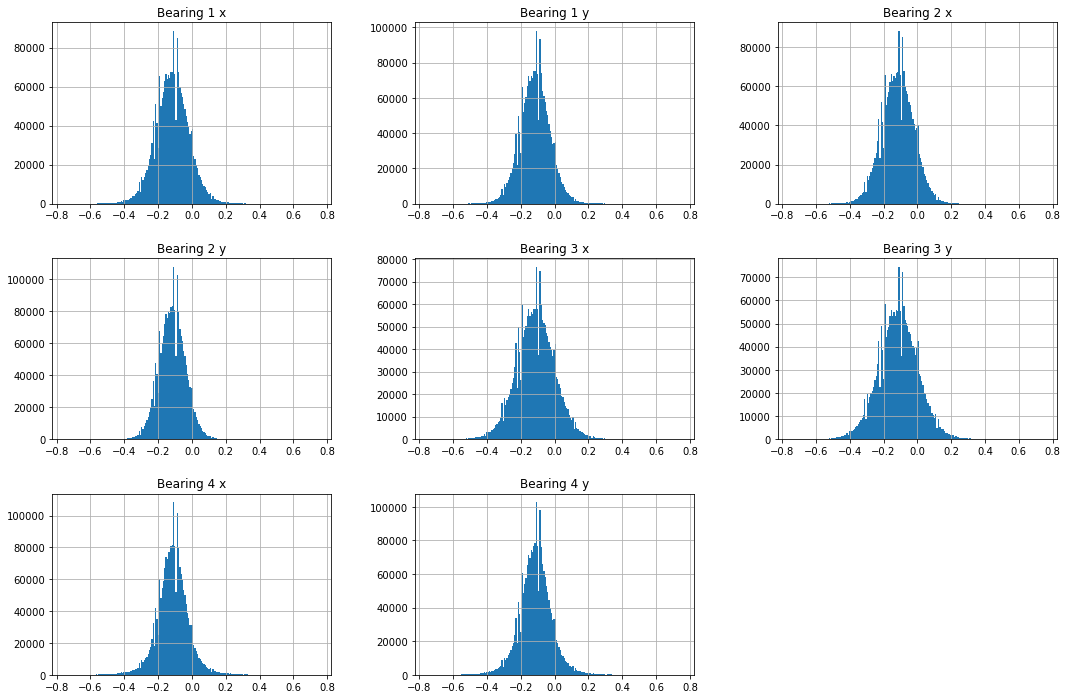

In [61]:
data1.hist(column = ['Bearing 1 x', 'Bearing 1 y', 'Bearing 2 x', 'Bearing 2 y', 'Bearing 3 x', 'Bearing 3 y', 'Bearing 4 x', 'Bearing 4 y'], range=[-0.75, 0.75], bins=200, figsize=(18,12))
plt.show() 

As we can see, the measurements approximately follow the normal leptokurtic distribution with no visible skewness.
<br/> 
There are however significant spikes around the midpoint of each histogram.

In [30]:
def makeCorrelationplot(xcol,ycol,df,toPaint):
    df.plot(x=xcol,y=ycol,kind="scatter",color='lightcoral', marker='D',ax=toPaint)
    xvec = df[xcol]
    yvec = df[ycol]
    m, b = np.polyfit(xvec, yvec, 1)

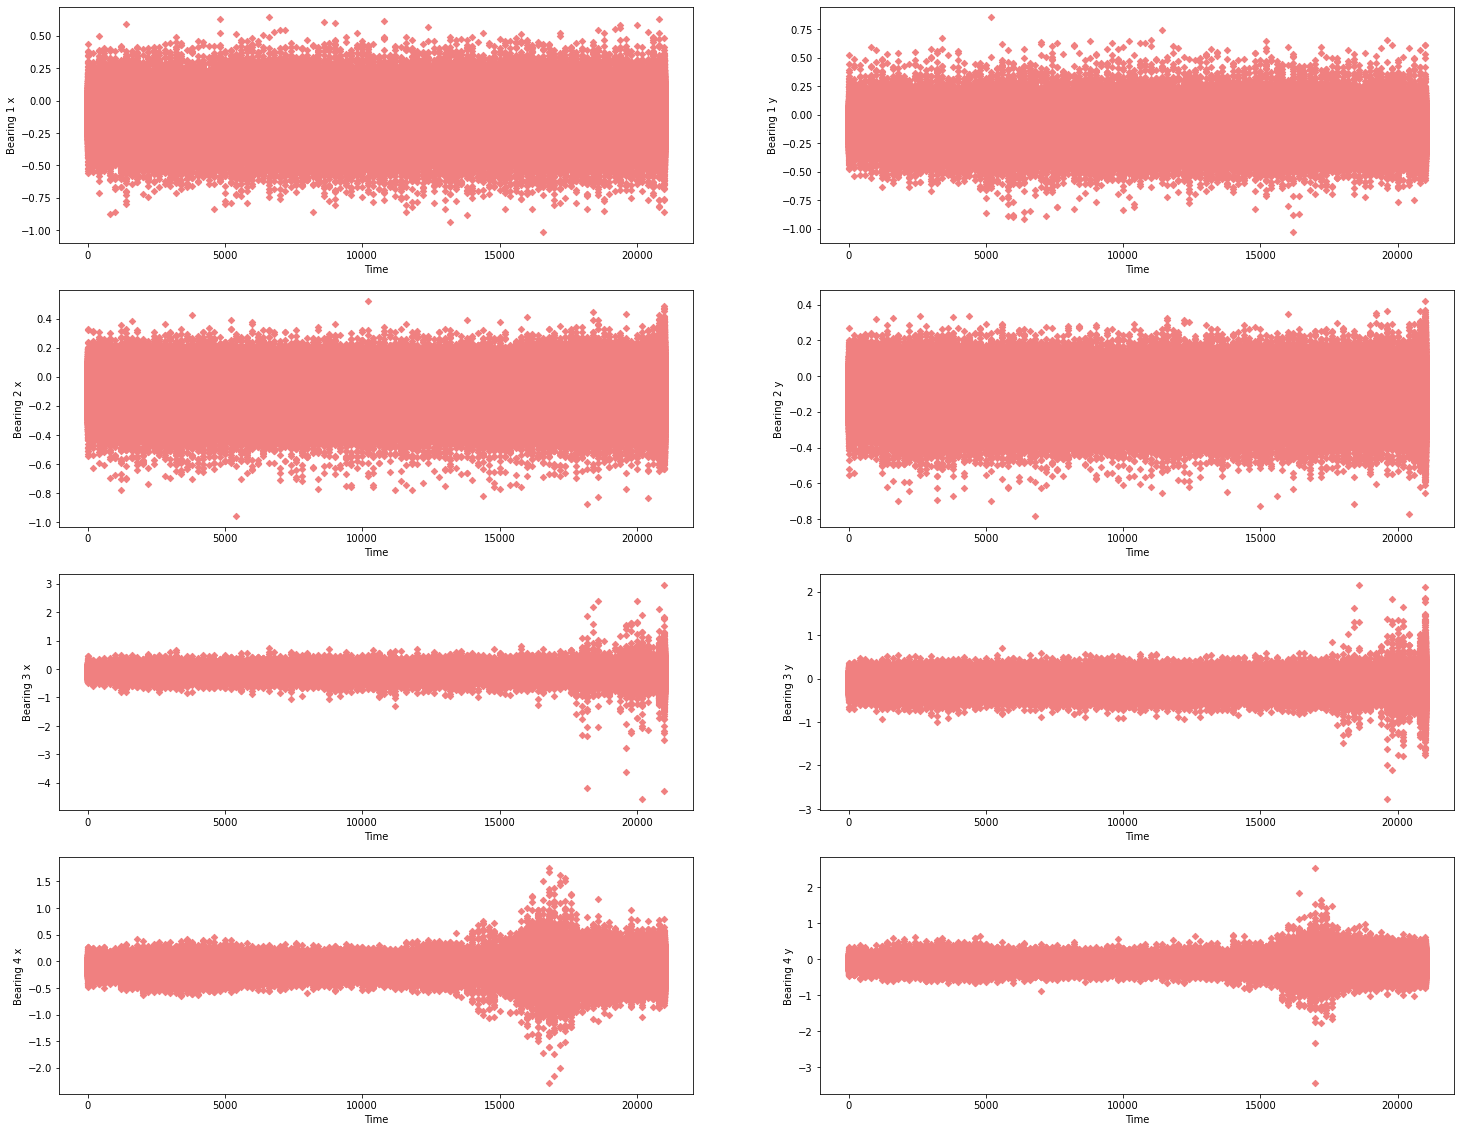

In [31]:
fig, ax = plt.subplots(4, 2, figsize=(25,20), squeeze=False)
makeCorrelationplot("Time","Bearing 1 x", data1, ax[0,0])
makeCorrelationplot("Time","Bearing 1 y", data1, ax[0,1])
makeCorrelationplot("Time","Bearing 2 x", data1, ax[1,0])
makeCorrelationplot("Time","Bearing 2 y", data1, ax[1,1])

makeCorrelationplot("Time","Bearing 3 x", data1, ax[2,0])
makeCorrelationplot("Time","Bearing 3 y", data1, ax[2,1])
makeCorrelationplot("Time","Bearing 4 x", data1, ax[3,0])
makeCorrelationplot("Time","Bearing 4 y", data1, ax[3,1])


plt.show()

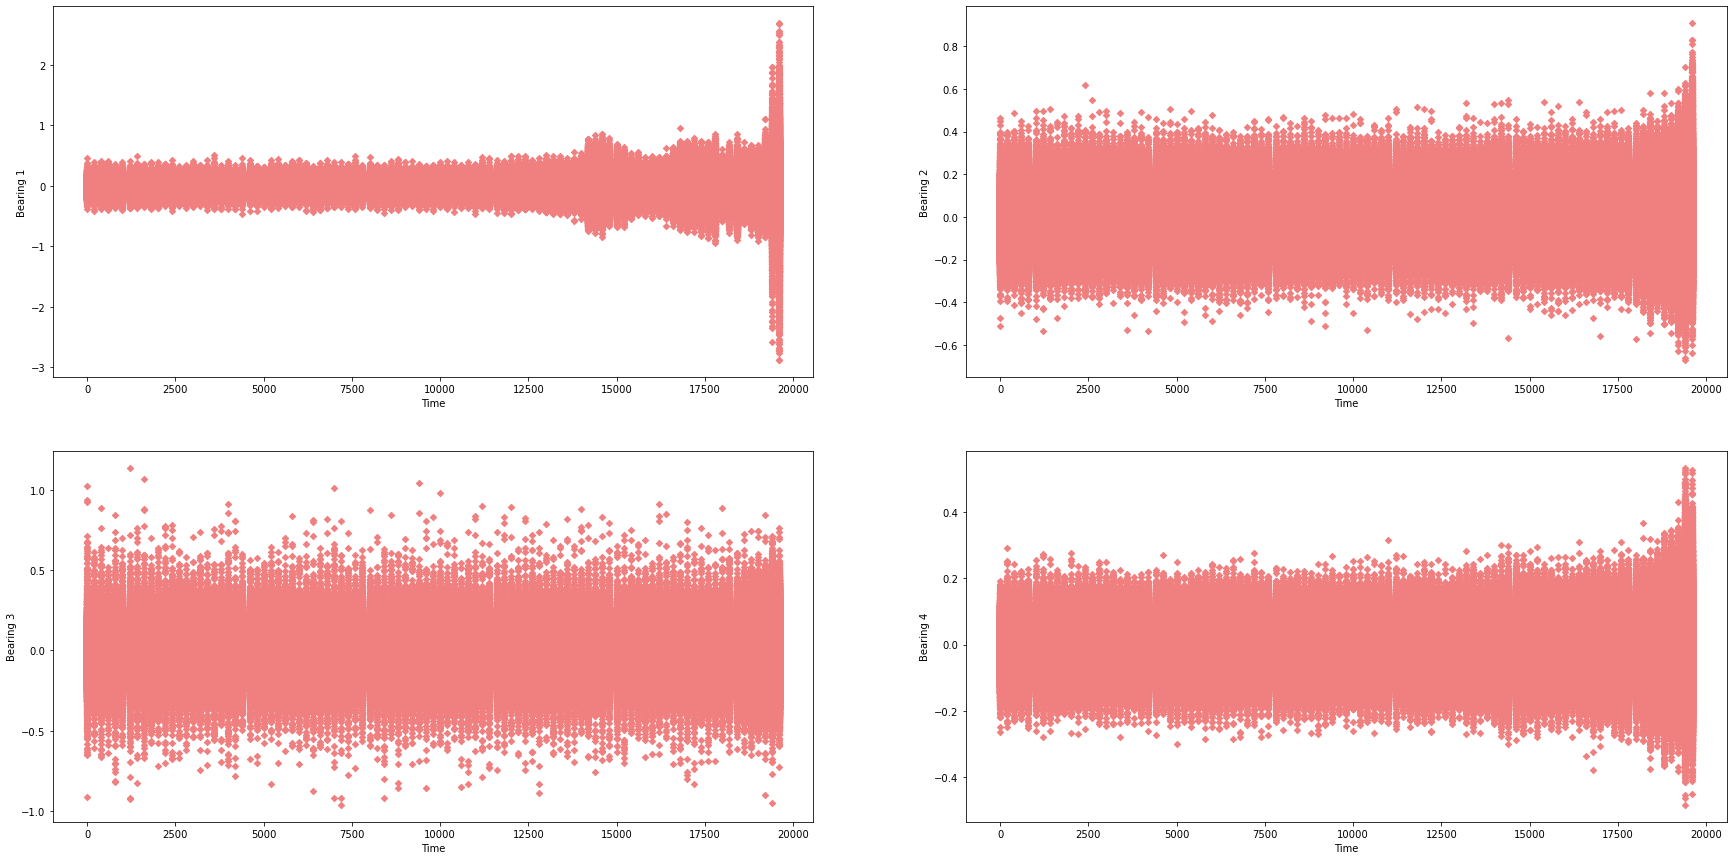

In [41]:
fig, ax = plt.subplots(2, 2, figsize=(30,15), squeeze=False)
makeCorrelationplot("Time","Bearing 1", data2, ax[0,0])
makeCorrelationplot("Time","Bearing 2", data2, ax[0,1])
makeCorrelationplot("Time","Bearing 3", data2, ax[1,0])
makeCorrelationplot("Time","Bearing 4", data2, ax[1,1])

plt.show()

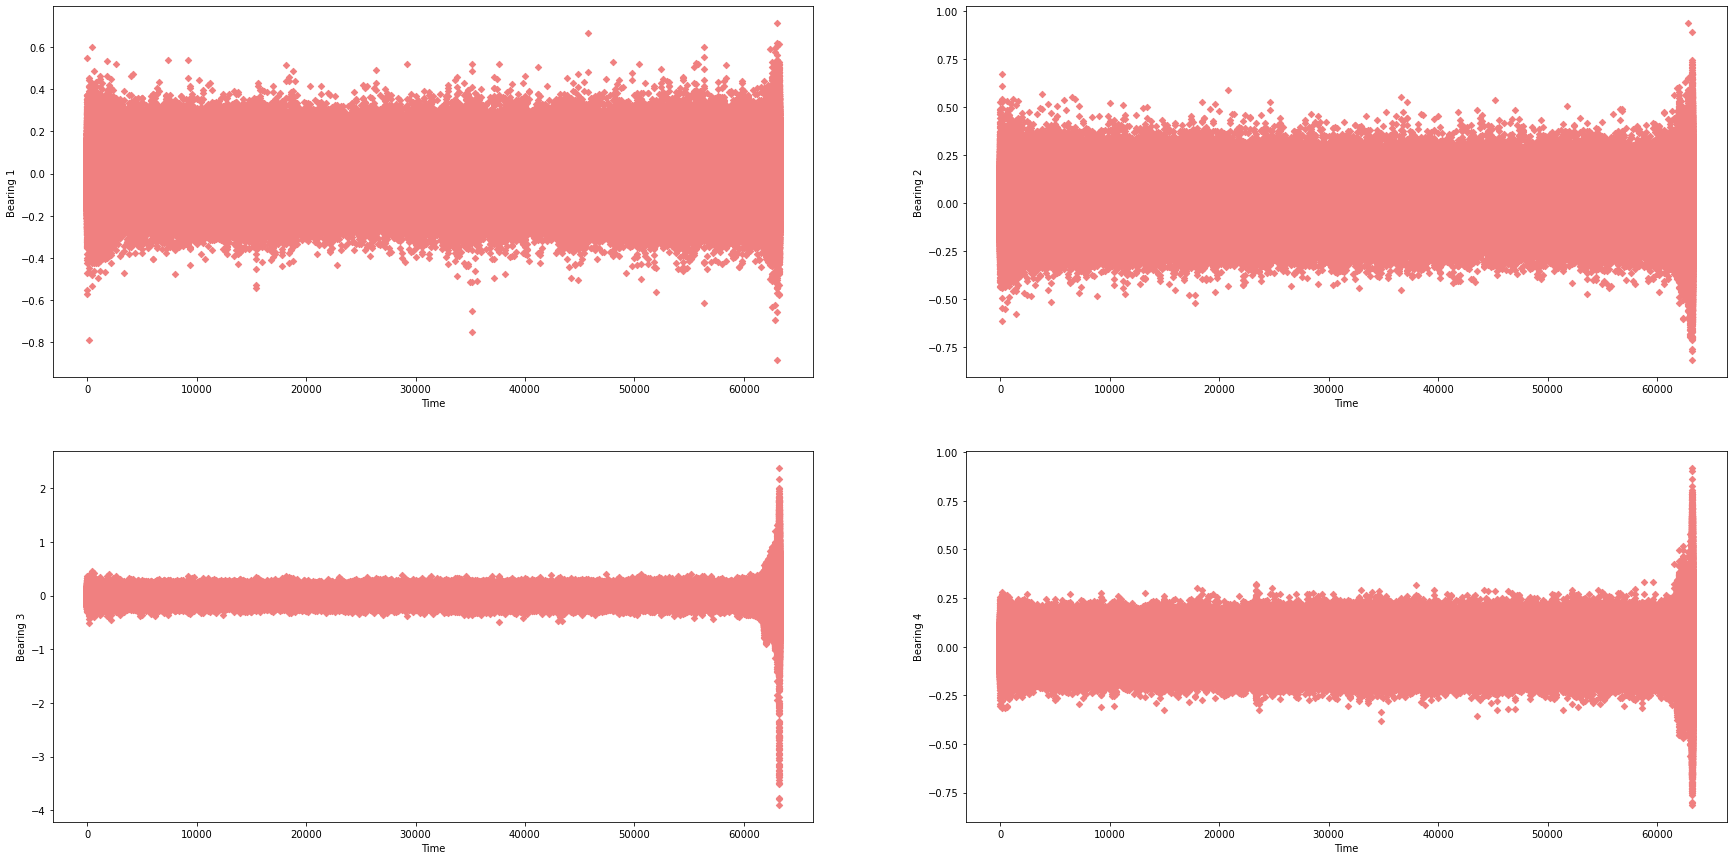

In [42]:
fig, ax = plt.subplots(2, 2, figsize=(30,15), squeeze=False)
makeCorrelationplot("Time","Bearing 1", data3, ax[0,0])
makeCorrelationplot("Time","Bearing 2", data3, ax[0,1])
makeCorrelationplot("Time","Bearing 3", data3, ax[1,0])
makeCorrelationplot("Time","Bearing 4", data3, ax[1,1])

plt.show()

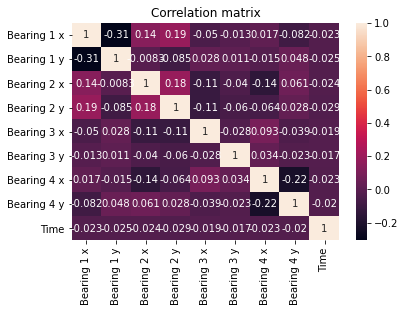

In [59]:
sns.heatmap(data1.corr(), annot=True).set_title('Correlation matrix') 
plt.show()
#Dark shades represent negative correlation while lighter shades represent positive correlation.

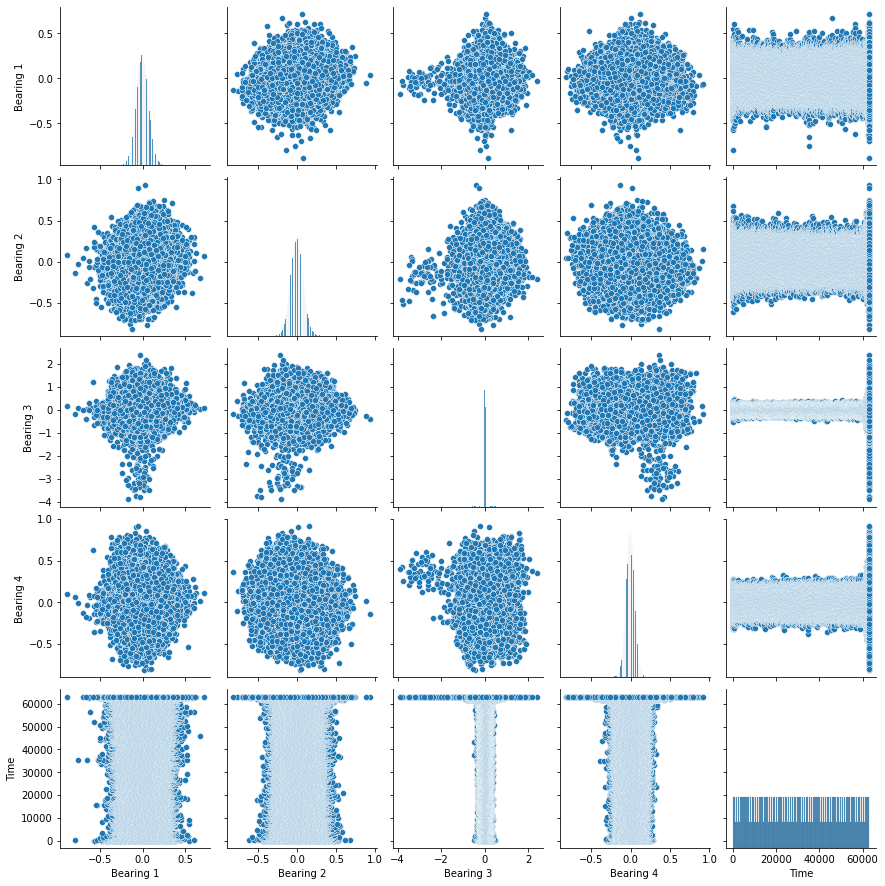

In [60]:
sns.pairplot(data3)
plt.show()